##**Load Status Prediction**

Installing all the libraries, Dependencies for Numerical Operations, Dataframe Operations, Data Visualization and **Machine Learning Algorithm**

In [2]:
#  Importing Libraries & Dependencies 
import warnings
import sklearn
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.metrics import confusion_matrix, classification_report

Setting the Background theme as fivethirtyeight

In [3]:
plt.style.use('fivethirtyeight')

##**Reading Data from the Dataset**

Importing the dataset from the csv file using pandas *read_csv* function

In [4]:
data=pd.read_csv('LoanData.csv')
data.shape

(614, 13)

Columns in the dataset

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Getting first 5 Values

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##**Descriptive Statistics**

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


For catagorical Variables present in the dataset

In [8]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002036,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


#**Data Cleaning**

Getting missing values of each column from the dataset

In [9]:
 data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Using Statistical Measures
<br>
Mode to impute Catagorical columns<br>
              &<br>
Median to impute the Numerical columns


In [10]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())


In [11]:
data.isnull().sum().sum()

0

##Data Visualization using Box Plot

Outliers in the Dataset

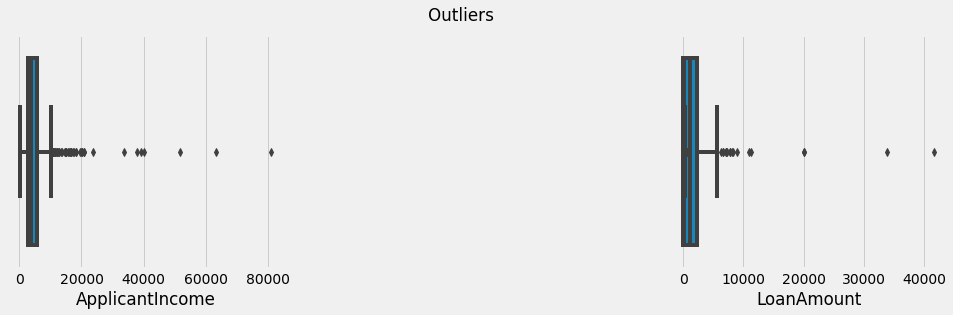

In [12]:
# Outliers
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers')
plt.show()

Filtering the Applicants having more than 25000 income

In [13]:
print("Before removing Outliers", data.shape)

data=data[data['ApplicantIncome'] < 25000]

print("After removing Outliers", data.shape)


Before removing Outliers (614, 13)
After removing Outliers (607, 13)


Removing Outliers from Coappicant's Income

In [14]:
print("Before removing Outliers", data.shape)

data=data[data['LoanAmount'] < 400]

print("After removing Outliers", data.shape)

Before removing Outliers (607, 13)
After removing Outliers (595, 13)


Removing Outliers from Loan Amount

Filtering based on loan amount less than 400

In [15]:
print("Before Removing Outliers ", data.shape)

data = data[data['LoanAmount'] < 400]

print("After Removing Outliers ", data.shape)

Before Removing Outliers  (595, 13)
After Removing Outliers  (595, 13)


**Univariant Data Analysis**

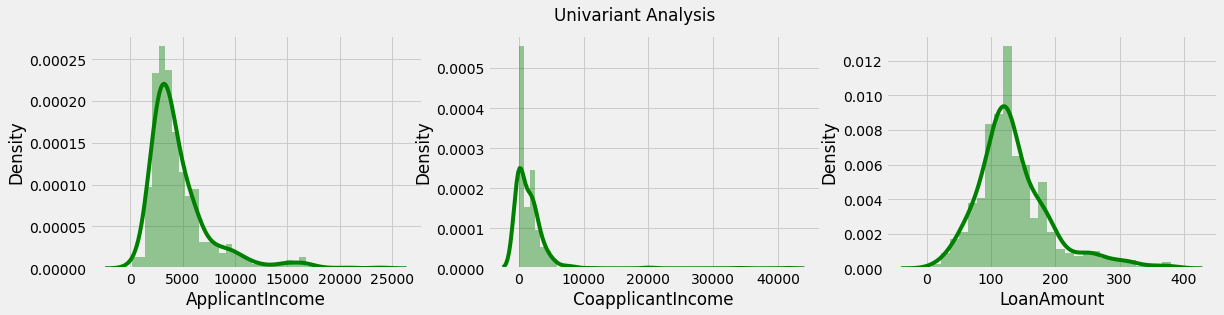

In [16]:
plt.rcParams['figure.figsize']=(18,4)
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color='green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color='green')

plt.suptitle('Univariant Analysis')
plt.show()

There's a lot of Skewness in the data of Applicant's Income and Coapplicant's Income.<br>
<br>
So, we apply log transformation to remove skewness


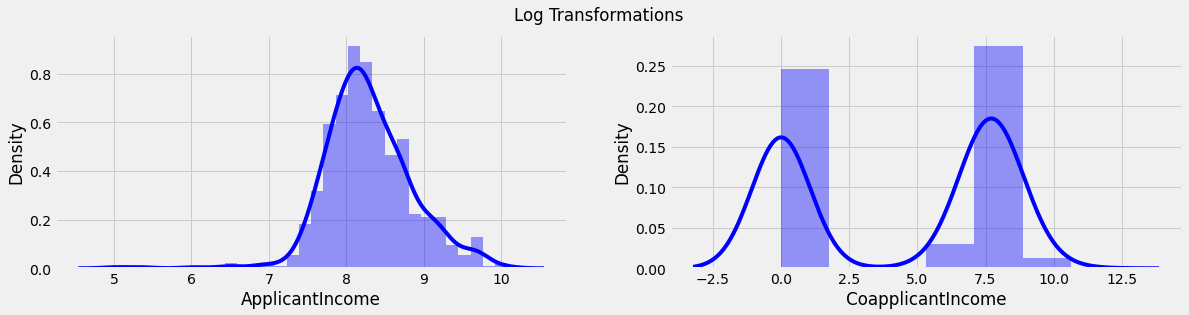

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,4)

data["ApplicantIncome"] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'], color='blue')

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'], color='blue')

plt.suptitle('Log Transformations')
plt.show()

Univariant Analysis

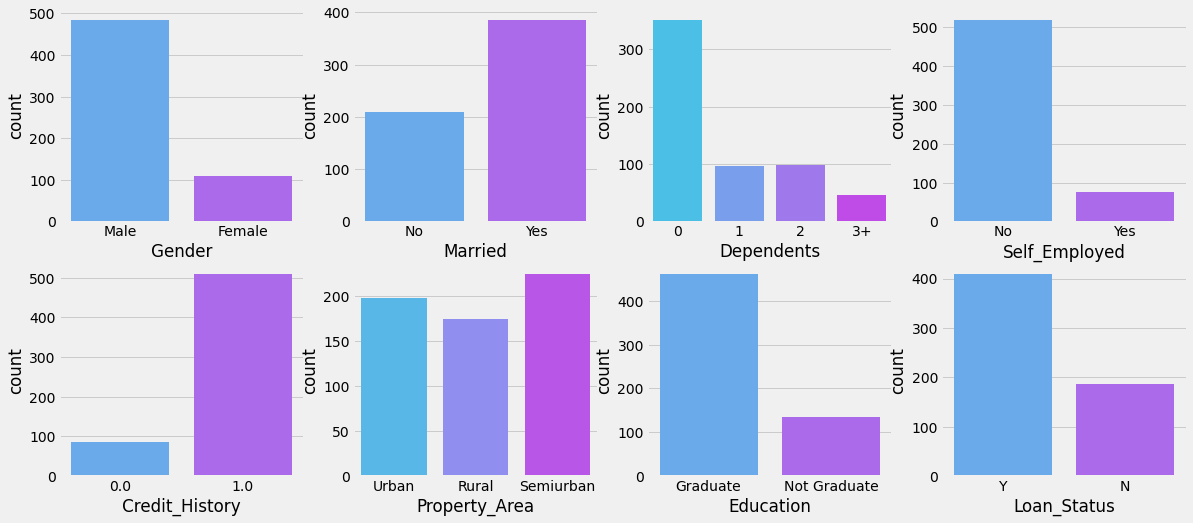

In [19]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,4,1)
sns.countplot(data['Gender'], palette='cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'], palette='cool')

plt.subplot(2,4,3)
sns.countplot(data['Dependents'], palette='cool')

plt.subplot(2,4,4)
sns.countplot(data['Self_Employed'], palette='cool')

plt.subplot(2,4,5)
sns.countplot(data['Credit_History'], palette='cool')

plt.subplot(2,4,6)
sns.countplot(data['Property_Area'], palette='cool')

plt.subplot(2,4,7)
sns.countplot(data['Education'], palette='cool')

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'], palette='cool')

plt.show()


Bivariant Analysis


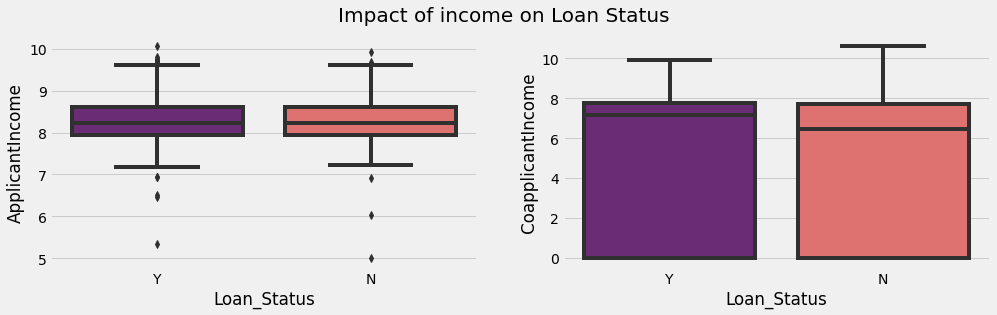

In [20]:
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'] , data['ApplicantIncome'], palette='magma')

plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette='magma')

plt.suptitle('Impact of income on Loan Status\n', fontsize=20)
plt.show()


Impact Of Amount on Loan Status

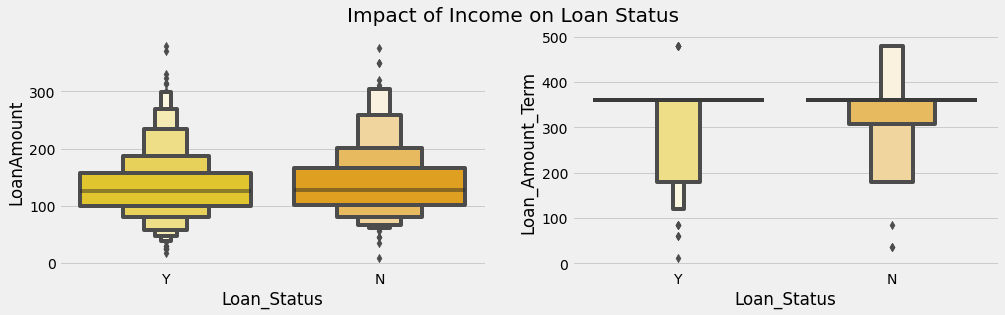

In [22]:
plt.rcParams['figure.figsize']=(15,4)

plt.subplot(1,2,1)
sns.boxenplot(data['Loan_Status'], data['LoanAmount'], palette='Wistia')

plt.subplot(1,2,2)
sns.boxenplot(data['Loan_Status'], data['Loan_Amount_Term'], palette='Wistia')

plt.suptitle('Impact of Income on Loan Status\n', fontsize=20)
plt.show()

In [23]:
 print('Impactof marriage on loan status')
 print(pd.crosstab(data['Loan_Status'],data['Married']))
 
 print('\nImpact of dependents on loan status')
 print(pd.crosstab(data['Loan_Status'], data['Dependents']))

 print('\nImpact of education on loan status')
 print(pd.crosstab(data['Loan_Status'], data['Education']))

 print('\nImpact of Employment on loan status')
 print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
 
 print('\nImpact of Property on loan status')
 print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Impactof marriage on loan status
Married       No  Yes
Loan_Status          
N             78  108
Y            131  278

Impact of dependents on loan status
Dependents     0   1   2  3+
Loan_Status                 
N            111  34  25  16
Y            241  63  74  31

Impact of education on loan status
Education    Graduate  Not Graduate
Loan_Status                        
N                 134            52
Y                 327            82

Impact of Employment on loan status
Self_Employed   No  Yes
Loan_Status            
N              160   26
Y              358   51

Impact of Property on loan status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     68
Y                108        172    129


**Preparing data for model**

Columns which are of object data types

In [24]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [25]:
print("Before Deleting Columns ",data.shape)
data=data.drop(['Loan_ID'], axis=1)
print("After Deleting Columns ",data.shape)

Before Deleting Columns  (595, 13)
After Deleting Columns  (595, 12)


In [26]:
data['Gender'] = data['Gender'].replace(('Male','Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes','No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'), (1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(1,0))

data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))
data.select_dtypes('object').columns

Index([], dtype='object')

In [28]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis=1)

print(x.shape)
print(y.shape)

(595, 11)
(595,)


**Resampling for Balancing Data**

Targeted class is highly imbalance.<br>
Using Over Sampling Technique to research the data.<br>
Using SMOTE Algorithm

In [29]:
x_resampling, y_resampling = SMOTE().fit_sample(x,y.values.ravel())
print(x_resampling.shape)
print(y_resampling.shape)

(818, 11)
(818,)


In [31]:
print('Before resampling')
print(y.value_counts())

print('After resampling')
y_resampling = pd.DataFrame(y_resampling)
print(y_resampling[0].value_counts())

Before resampling
1    409
0    186
Name: Loan_Status, dtype: int64
After resampling
1    409
0    409
Name: 0, dtype: int64


In [32]:

x_train, x_test, y_train, y_test = train_test_split(x_resampling, y_resampling, test_size = 0.2, random_state = 0)
print("Shape x train", x_train.shape)
print("Shape y train",y_train.shape)
print("Shape x test", x_test.shape)
print("Shape y test", y_test.shape)

Shape x train (654, 11)
Shape y train (654, 1)
Shape x test (164, 11)
Shape y test (164, 1)


**Machine Learning Model**

Applying Logistic Regression

In [39]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_prediction = model.predict(x_test)
print("Training Accuracy", model.score(x_train,y_train))
print("Testing Accuracy",model.score(x_test,y_test))

Training Accuracy 0.7629969418960245
Testing Accuracy 0.725609756097561


Analyze the performance using the Confusion Matrix

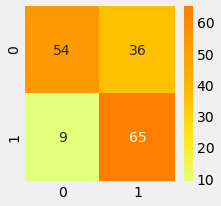

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        90
           1       0.64      0.88      0.74        74

    accuracy                           0.73       164
   macro avg       0.75      0.74      0.72       164
weighted avg       0.76      0.73      0.72       164



In [41]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_prediction)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap='Wistia', fmt='.8g')
plt.show()

cr=classification_report(y_test, y_prediction)
print(cr)


Logistic Regression provides less efficiency so we try Gradient Boosting using Decision Trees

In [42]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
model = gbc()
model.fit(x_train,y_train)
y_prediction = model.predict(x_test)

print("Training Accuracy", model.score(x_train,y_train))
print("Testing Accuracy", model.score(x_test,y_test))

Training Accuracy 0.9204892966360856
Testing Accuracy 0.7926829268292683


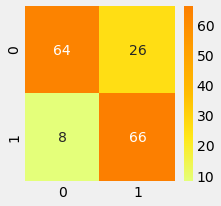

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        90
           1       0.72      0.89      0.80        74

    accuracy                           0.79       164
   macro avg       0.80      0.80      0.79       164
weighted avg       0.81      0.79      0.79       164



In [43]:
cm = confusion_matrix(y_test, y_prediction)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap='Wistia', fmt='.8g')
plt.show()

cr=classification_report(y_test, y_prediction)
print(cr)

In [44]:
from sklearn.model_selection import cross_val_score
clf = gbc(random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.8030303  0.83333333 0.84848485 0.83333333 0.86153846 0.87692308
 0.87692308 0.86153846 0.73846154 0.86153846]
